## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# Initial Setup And Loading Data Airbnb

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# For  loading data from Drive
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
# Loading Data from offline files
df=pd.read_csv('Copy of Airbnb NYC 2019.csv')

In [3]:
# Peeking into the Data
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# Obtaining important info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Observations
1)The total number of rows and columns is 48895 and 16 respectively.

2)Some columns have null values and missing data,we will need to clean those.

In [5]:
df.isnull().sum()



id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Observations
1)Columns like name,host_name,last_review,reviews_per_month have missing values.
name and host_name column is not important as it does not convey any meaningful data.
So those columns can be dropped.

2)last_review and reviews_per_month have the same number of NaN values which means certain properties were not rated at all hence last_review has no date and reviews_per_month has no data.

In [18]:
# Drop the columns like name,host_name and last review
df.drop(['host_name','name','last_review'],inplace=True,axis=1)
#checking changes
df.isnull().sum()

# Null Values exist in  only reviews per month column

id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [19]:
# Replacing the NaN with zero
df.fillna({'reviews_per_month':0},inplace=True)
df.isnull().sum()
# All Null Values are Eliminated

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [20]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### Observation ####
The Minimum 'Price' is 0 which is not possible.

The Maximum 'minimum_nights' is 1250 which is also highly unlikely.

In [26]:
df[df['price']==0]
#Rows which have 'price'=0

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,8993084,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,0.05,4,28
25433,20333471,131697576,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2.56,4,127
25634,20523843,15787004,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,0.71,5,0
25753,20608117,1641537,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,0.53,2,0
25778,20624541,10132166,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0.15,1,73
25794,20639628,86327101,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,4.28,6,176
25795,20639792,86327101,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,4.37,6,232
25796,20639914,86327101,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,4.35,6,222
26259,20933849,13709292,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,0.00,1,0
26841,21291569,101970559,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,0.11,6,333


In [58]:
# A function for price_correction
def price_correction(x):
    if x==0:
        return 100
    else:
        return x

In [39]:
df[df['price']==0]
#Rows which have 'price'=0

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,8993084,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,0.05,4,28
25433,20333471,131697576,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2.56,4,127
25634,20523843,15787004,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,0.71,5,0
25753,20608117,1641537,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,0.53,2,0
25778,20624541,10132166,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0.15,1,73
25794,20639628,86327101,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,4.28,6,176
25795,20639792,86327101,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,4.37,6,232
25796,20639914,86327101,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,4.35,6,222
26259,20933849,13709292,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,0.00,1,0
26841,21291569,101970559,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,0.11,6,333


In [66]:
# Using the price_correction function to change the 'price'
df['price']=df['price'].apply(price_correction)

In [67]:
# 'price' has no value equal to zero
df[df['price']==0]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


In [69]:
#Changing values of 'minimum_nights' to 365 which are greater than 365
df['minimum_nights']=df['minimum_nights'].apply(lambda x: 365 if x>365 else x)

In [70]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.743184,6.942980,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.144546,17.530294,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,365.000000,629.000000,58.500000,327.000000,365.000000


# Data is Cleaned and all values which do not make sense  are removed

# Exploratory Data Analysis #
1)Exploring the data columnwise from left to right

In [72]:
df.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [74]:
max_hostid=df['host_id'].value_counts().head(10)
max_hostid
#Considering 10 highest host_id listings.The maximum host_id listing is 327.

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [79]:
#creating a dataframe with max_hostid data
df_hostid=pd.DataFrame(data=max_hostid)
df_hostid.reset_index(inplace=True)
df_hostid.rename(columns={'index':'Host_ID', 'host_id':'Listings_Count'}, inplace=True)
df_hostid

,Host_ID,Listings_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


In [82]:
#setting the runtime configuration and parameters for all visualizatins
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style('white')

[Text(0, 0, '7503643'),
 Text(1, 0, '12243051'),
 Text(2, 0, '16098958'),
 Text(3, 0, '22541573'),
 Text(4, 0, '30283594'),
 Text(5, 0, '61391963'),
 Text(6, 0, '107434423'),
 Text(7, 0, '137358866'),
 Text(8, 0, '200380610'),
 Text(9, 0, '219517861')]

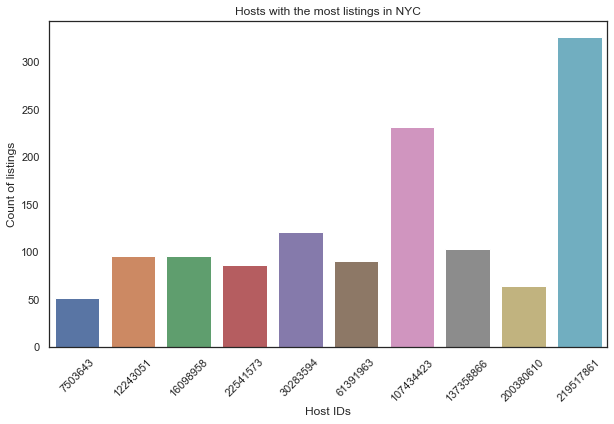

In [83]:
fig_1=sns.barplot(x='Host_ID',y='Listings_Count',data=df_hostid)
fig_1.set_title('Hosts with the most listings in NYC')
fig_1.set_ylabel('Count of listings')
fig_1.set_xlabel('Host IDs')
fig_1.set_xticklabels(fig_1.get_xticklabels(), rotation=45)
# fig_1 states that the number of listing in top 10 is numerous

In [86]:
# Analysing the column 'neighbourhood group'
all_neighbourhood_group=df['neighbourhood_group'].value_counts()
all_neighbourhood_group

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [88]:
df_neighbourhood_group

,index,neighbourhood_group
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


In [90]:
df_neighbourhood_group=pd.DataFrame(data=all_neighbourhood_group)
df_neighbourhood_group.reset_index(inplace=True)
df_neighbourhood_group.rename(columns={'index':'Neighbourhood_Group','neighbourhood_group':'Counts'},
                              inplace=True)
df_neighbourhood_group

,Neighbourhood_Group,Counts
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


Text(0, 0.5, 'Counts')

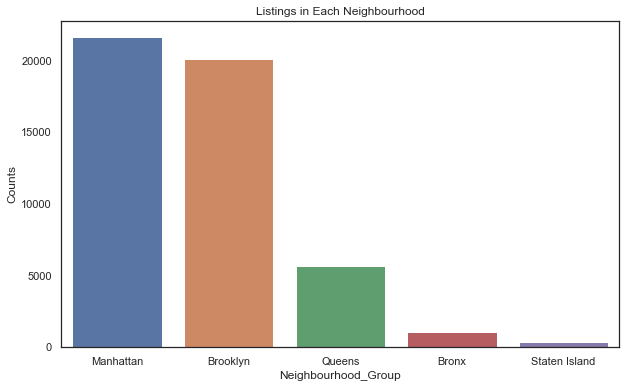

In [91]:
fig_2=sns.barplot(x=df_neighbourhood_group['Neighbourhood_Group'],y=df_neighbourhood_group['Counts'])
fig_2.set_title('Listings in Each Neighbourhood')
fig_2.set_xlabel('Neighbourhood_Group')
fig_2.set_ylabel('Counts')

The Majority of the listings are located in Manhattan and Brooklyn whereas Bronx and Staten Island have a miniscule share

In [93]:
df_neighbourhood_group_groupby=df.groupby(by='neighbourhood_group')
df_neighbourhood_group_groupby.first()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,,,
Bronx,44096,190409,Highbridge,40.83232,-73.93184,Private room,40,1,219,2.04,3,353
Brooklyn,2539,2787,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
Manhattan,2595,2845,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
Queens,12937,50124,Long Island City,40.74771,-73.94740,Private room,130,3,248,2.25,1,215
Staten Island,42882,185978,St. George,40.64524,-74.08088,Private room,70,2,166,1.66,1,312


In [94]:
df_neighbourhood_group_groupby.get_group('Bronx')

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
171,44096,190409,Bronx,Highbridge,40.83232,-73.93184,Private room,40,1,219,2.04,3,353
207,54626,190409,Bronx,Highbridge,40.83075,-73.93058,Private room,45,1,138,1.45,3,323
260,63588,295128,Bronx,Clason Point,40.81309,-73.85514,Private room,90,2,0,0.00,7,349
261,63610,310670,Bronx,Eastchester,40.88057,-73.83572,Entire home/apt,105,2,38,0.50,13,365
309,71812,369015,Bronx,Kingsbridge,40.87207,-73.90193,Entire home/apt,90,30,4,0.35,2,346
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48783,36426093,273877318,Bronx,Claremont Village,40.83926,-73.91173,Private room,140,1,0,0.00,1,90
48792,36428186,141511069,Bronx,Morrisania,40.83146,-73.89666,Entire home/apt,80,7,0,0.00,1,71
48795,36429652,58222366,Bronx,Claremont Village,40.83502,-73.91058,Private room,125,2,0,0.00,1,364
48796,36435986,37678939,Bronx,Concourse Village,40.83372,-73.91187,Private room,70,2,0,0.00,2,81


In [114]:
df_neighbourhood_price=df_neighbourhood_group_groupby['price'].describe()

In [115]:
df_neighbourhood_price

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,87.588451,106.677067,10.0,45.0,65.0,99.0,2500.0
Brooklyn,20104.0,124.427975,186.855712,10.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.880430,291.380856,10.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.517649,167.102155,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


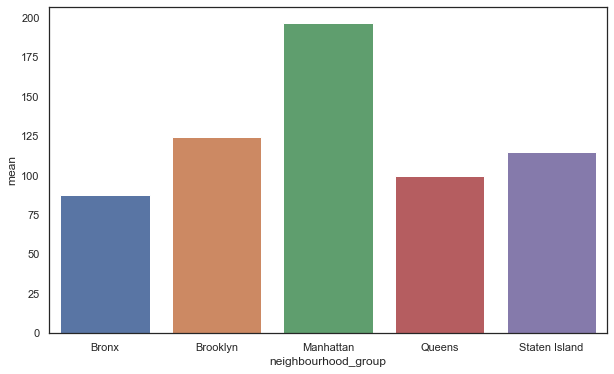

In [126]:
fig_3=sns.barplot(y=df_neighbourhood_price['mean'],x=df_neighbourhood_price.index[0:5])

In [124]:
df_neighbourhood_price.index[0:5]

Index(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], dtype='object', name='neighbourhood_group')

Manhattan is the most expensive neighbourhood_group followed by Brooklyn Staten Island Queens and Bronx

In [127]:
df.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [137]:
room_type_data=df['room_type'].value_counts()
room_type_data

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [145]:
df_room_type=pd.DataFrame(data=room_type_data)
df_room_type.reset_index(inplace=True)
df_room_type.rename(columns={'index':'Room_Type','room_type':'Count'},inplace=True)
df_room_type

,Room_Type,Count
0,Entire home/apt,25409
1,Private room,22326
2,Shared room,1160


<AxesSubplot:xlabel='room_type', ylabel='count'>

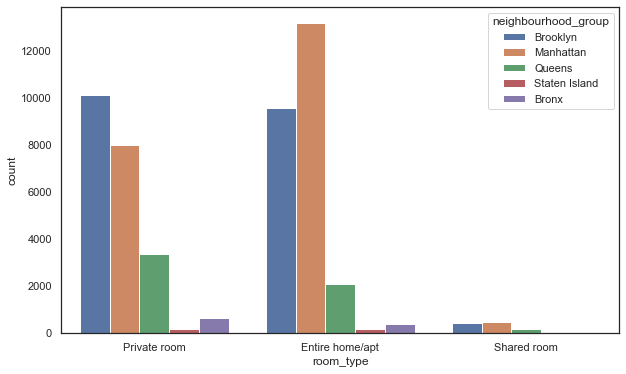

In [147]:
fig_4=sns.countplot(x=df['room_type'],hue=df['neighbourhood_group'])
fig_4

### Observation ###

1)Most Listings offer Entire home followed by Private Room and Shared Room

2)Brooklyn offers nearly the same number of private rooms and entire home whereas Manhattan offers highest number of entire homes followed byprivate rooms.

3)Listing of shared room is very little and staten islands and bronx offer very few shared rooms

In [152]:
# df[(df['neighbourhood_group']=='Staten Island') & (df['room_type']=='Shared room')]
df[(df['neighbourhood_group']=='Staten Island') & (df['room_type']=='Shared room')].shape
# Only 9 listings offer shared rooms in Staten Islands

(9, 13)

In [156]:
df[(df['neighbourhood_group']=='Bronx') & (df['room_type']=='Shared room')]
df[(df['neighbourhood_group']=='Bronx') & (df['room_type']=='Shared room')].shape
#Only 60 listings are offering shared rooms in Bronx


(60, 13)

[Text(0, 0, 'Williamsburg'),
 Text(1, 0, 'Bedford-Stuyvesant'),
 Text(2, 0, 'Harlem'),
 Text(3, 0, 'Bushwick'),
 Text(4, 0, 'Upper West Side'),
 Text(5, 0, "Hell's Kitchen"),
 Text(6, 0, 'East Village'),
 Text(7, 0, 'Upper East Side'),
 Text(8, 0, 'Crown Heights'),
 Text(9, 0, 'Midtown')]

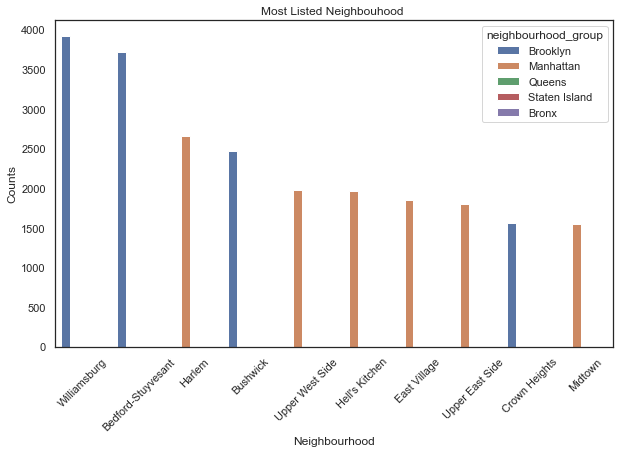

In [169]:
fig_5=sns.countplot(x=df['neighbourhood'],order=df.neighbourhood.value_counts().iloc[:10].index,
                    hue=df['neighbourhood_group'])
fig_5.set_title('Most Listed Neighbouhood ')
fig_5.set_xlabel('Neighbourhood')
fig_5.set_ylabel('Counts')
fig_5.set_xticklabels(fig_5.get_xticklabels(), rotation=45)
#It is evident from the plot that Williamsburg,Bedford-Stuyvesant and Harlem 
# are the most listed neighbourhood

#Brooklyn and Manhattan has the majority share of listings

In [170]:
df['neighbourhood'].value_counts()[0:10]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

In [171]:
df.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

<AxesSubplot:xlabel='number_of_reviews', ylabel='price'>

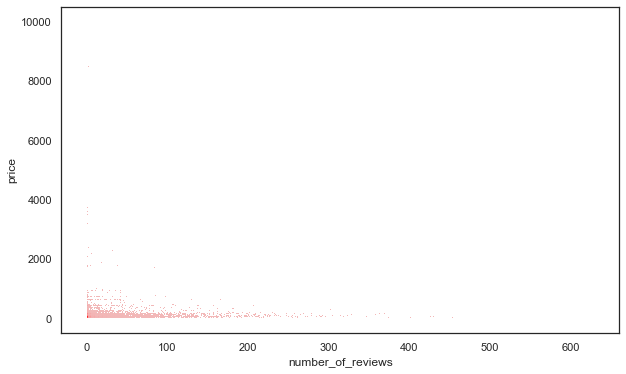

In [190]:
sns.histplot(y=df['price'],x=df['number_of_reviews'],color='red')
# Price and Number of reviews have points very far which do not render a proper picture

In [191]:
df.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [194]:
df.head(2)

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355


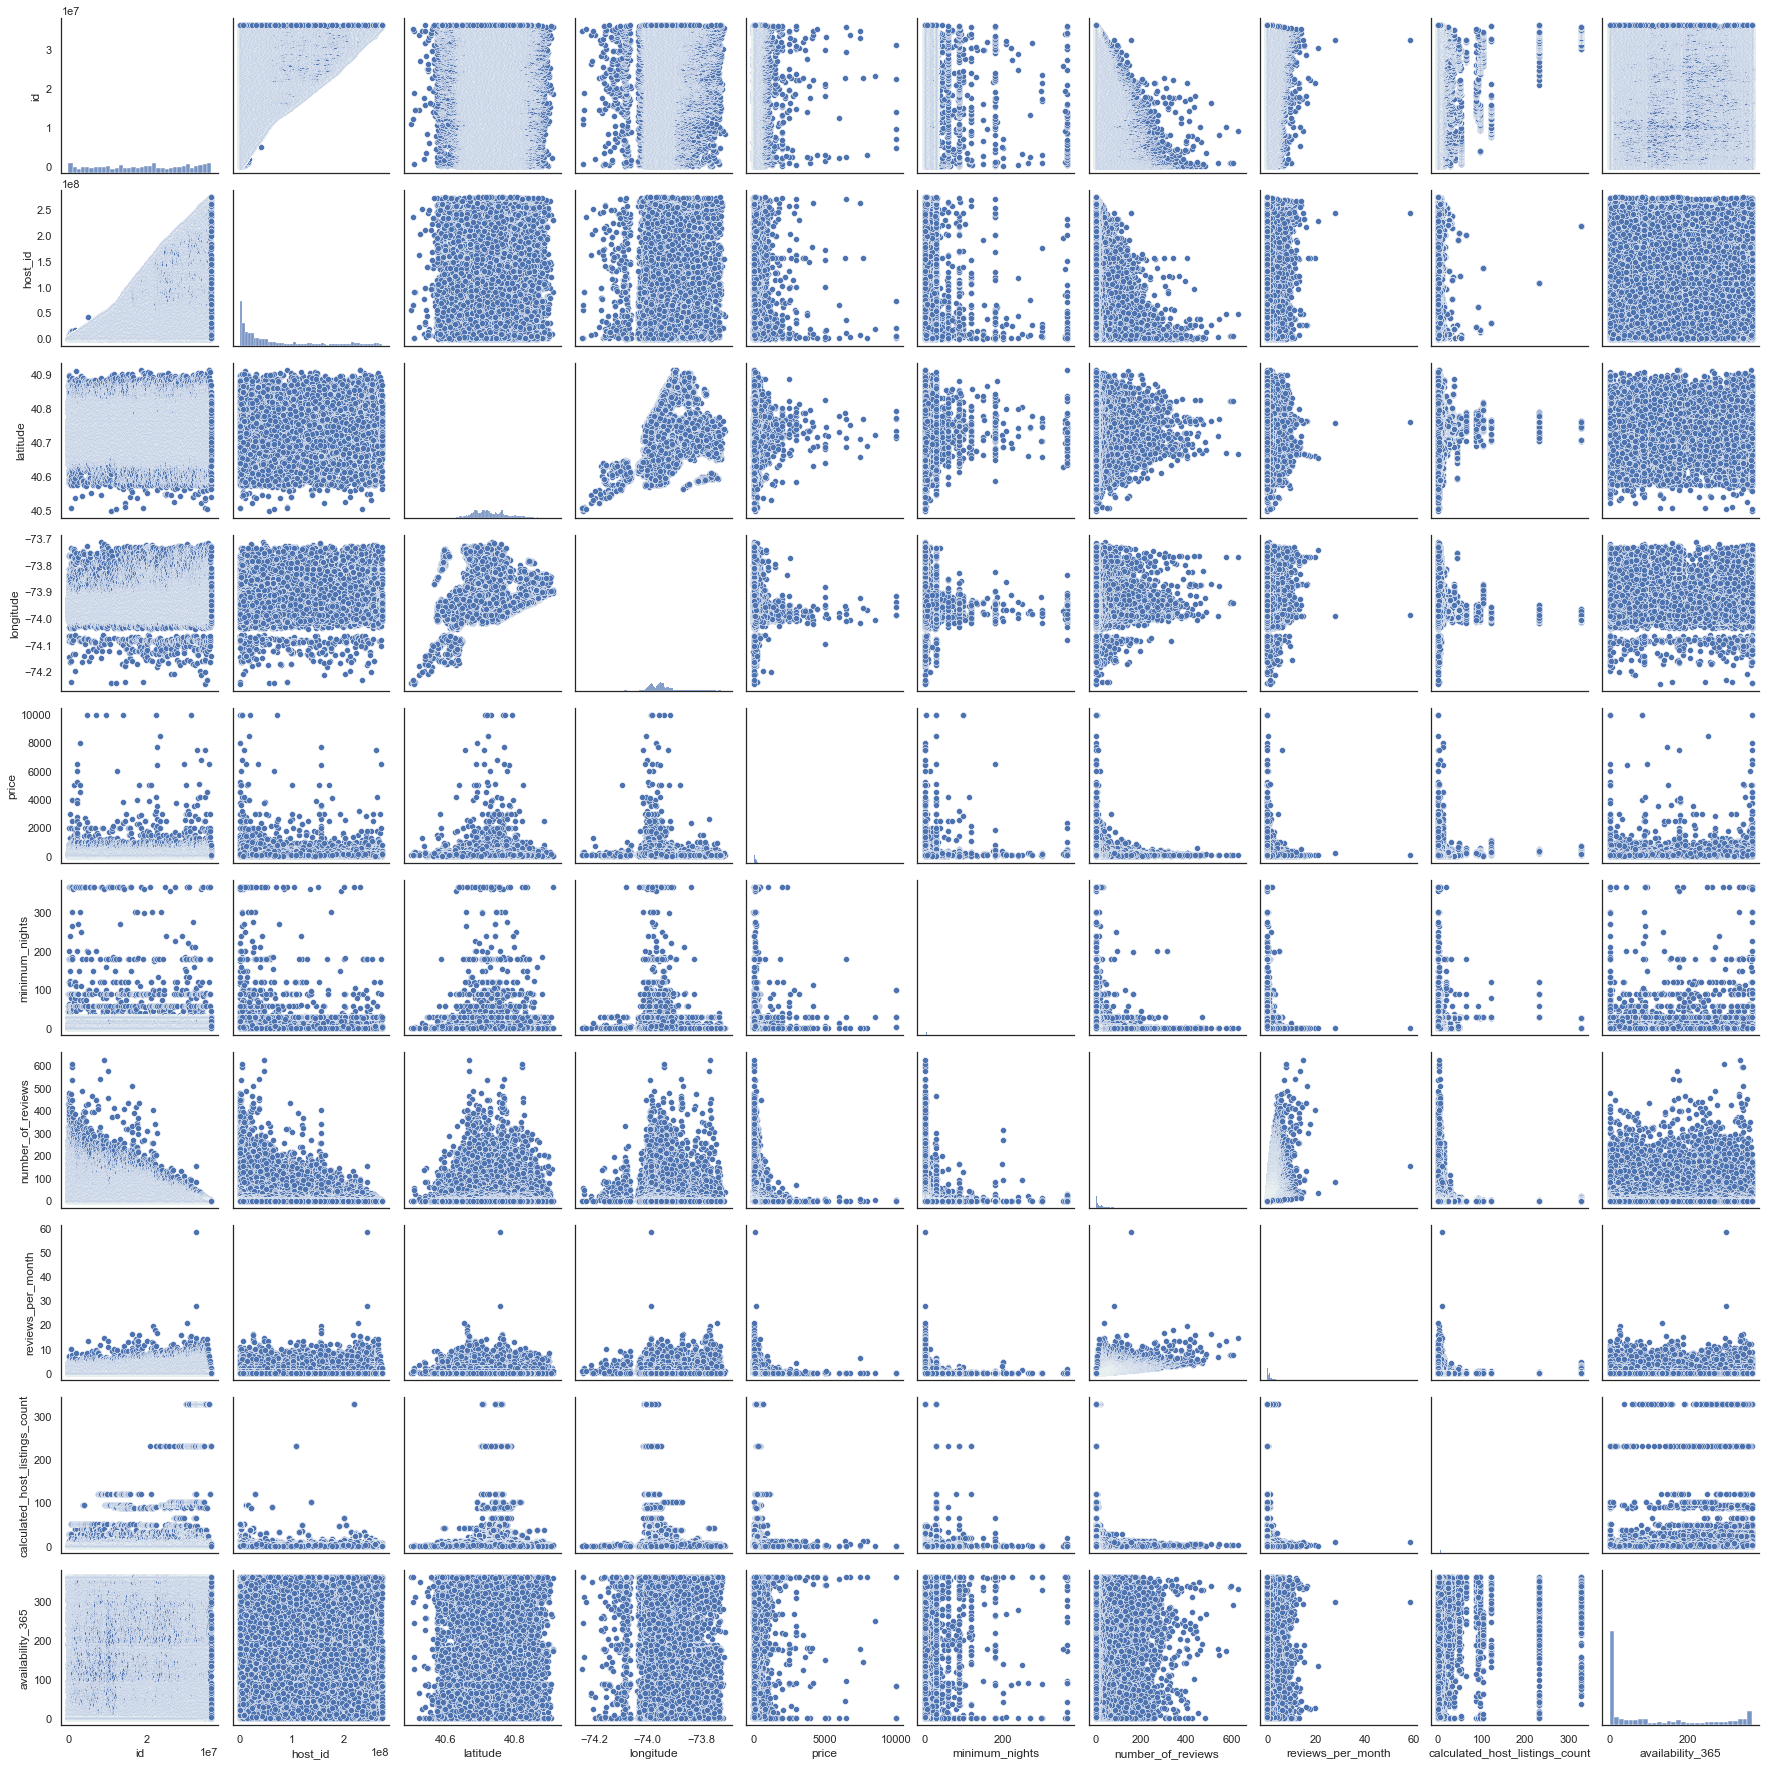

In [192]:
sns.pairplot(data=df)

In [193]:
df.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

### Conclusion ###
This is the end of our EDA Project as there is no useful Data and insights left to extract.
